In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import ast
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import lasso_path
from sklearn.linear_model import ElasticNetCV

## Data Prep

In [2]:
#embedding dataset
df=pd.read_csv(r"C:\Users\Sarthak\Downloads\research project\final embeddings\single_df\cleaned\ZurichNLP_unsup-simcse-xlm-roberta-base_final__single_df_clean.csv", encoding='ISO-8859-1')
#feature dataset
df_t=pd.read_csv(r"C:\Users\Sarthak\Downloads\research project\text_features.csv", encoding='ISO-8859-1')


In [3]:
df_single=df[df["Item Type"]=="single choice"]
df_t_single=df_t[df_t["Item Type"]=="single choice"]

In [4]:
#combine the two dataframes and convet the columns that have tensor to list withing the same cell dataframe
df_comb=pd.merge(df_single,df_t_single,how='left', on='InternCode')
df_comb.replace('Missing',"N/A",inplace=True)

In [5]:
#remove the columns that are repeated
df_comb.drop(['Title_y',
'Content_y',
'Question_y',
'Correct Response_y',
'Item Discrimination_y',
'Item Difficulty_y',
'Response Option 1_y',
'Response Option 2_y',
'Response Option 3_y',
'Response Option 4_y',
'Response Option 5_y',
'Response Option 6_y',
'Response Option 7_y',
'Item Type_y'],axis=1,inplace=True)
df_comb.head()


,InternCode,Title_x,Content_x,Item Discrimination_x,Item Difficulty_x,Question_x,Correct Response_x,Item Type_x,Response Option 1_x,Response Option 2_x,...,Response Option 7_Cosine_Similarity_with_Response Option 3,Response Option 7_Euclidean_Distance_with_Response Option 3,Response Option 7_Cosine_Similarity_with_Response Option 4,Response Option 7_Euclidean_Distance_with_Response Option 4,Response Option 7_Cosine_Similarity_with_Response Option 5,Response Option 7_Euclidean_Distance_with_Response Option 5,Response Option 7_Cosine_Similarity_with_Response Option 6,Response Option 7_Euclidean_Distance_with_Response Option 6,Response Option 7_Cosine_Similarity_with_Response Option 7,Response Option 7_Euclidean_Distance_with_Response Option 7
0,C_SX_DE_Les_A0012_00080_V02,Haiti,Nur wenige Tage nach dem Erdbeben baute HEKS H...,1.33424,0.958178,Die humanitÃ¤re Hilfe in GrandAnse besteht unt...,der Ausbildung von Facharbeitern,single choice,dem Ausbau von mehr als km Strassen,dem Einbau von Warnsystemen vor Erdbeben,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
1,C_SX_DE_Les_A0012_00082_V01,Haiti,Nur wenige Tage nach dem Erdbeben baute HEKS H...,0.69854,0.475492,Die Aufgabe der lokalen Komitees in Petit Gove...,auszuwÃ¤hlen wem der Wiederaufbau zugutekommt,single choice,auszuwÃ¤hlen wem der Wiederaufbau zugutekommt,die geeigneten Hilfswerke auszusuchen,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
2,C_SX_DE_Les_A0012_00084_V00,Haiti,Nur wenige Tage nach dem Erdbeben baute HEKS H...,1.56769,0.733015,Was wurde veruntreutÂ Klicke die Antwort an\n\...,Man hat Waren aus einem Depot gestohlen,single choice,Eine Viertelmillion Franken wurde unterschlagen,Man hat Waren aus einem Depot gestohlen,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
3,C_SX_DE_Les_A0012_00093_V00,Ignaz Semmelweis. Zahllose WÃ¶chnerinnen verda...,WÃ¤hrend auf der Station der Hebammen die Zahl...,1.31780,0.592040,Weshalb ist die Sterberate bei den WÃ¶chnerinn...,Die Ãrzte untersuchen abwechselnd Verstorbene...,single choice,Die Ãrzte behandeln die Schwangeren mit falsc...,Die Ãrzte untersuchen abwechselnd Verstorbene...,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
4,C_SX_DE_Les_A0012_00095_V02,Ignaz Semmelweis. Zahllose WÃ¶chnerinnen verda...,WÃ¤hrend auf der Station der Hebammen die Zahl...,2.65344,0.556719,Wie reagierenÂ MÃ¼tter und MedizinerÂ Klicke d...,Die MÃ¼tter freuen sich und die Ãrzte sind ne...,single choice,Beide betrachten Semmelweis als Helden,Die Mediziner sind stolz und dieÂ MÃ¼tter Ã¤rg...,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A


## Train/ Test Split

In [6]:
#remove the columns that are not needed (text columns)
X=df_comb.drop(['Title_x',
'Content_x',
'Question_x',
'Correct Response_x',
'Item Discrimination_x',
'Item Difficulty_x',
'Response Option 1_x',
'Response Option 2_x',
'Response Option 3_x',
'Response Option 4_x',
'Response Option 5_x',
'Response Option 6_x',
'Response Option 7_x',
'InternCode',	
'Item Type_x'],axis=1)
X.replace('N/A', 0, inplace=True)
y = df_comb['Item Difficulty_x']
#0.3 train test split
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,10:], y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Lasso

In [7]:
# Fit Lasso Regression
lasso = Lasso(alpha=0.1)  # Adjust alpha for regularization
lasso.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lasso.predict(X_test_scaled)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display feature coefficients
print("Feature Coefficients:", lasso.coef_)


Mean Squared Error: 0.5571287885778209
Feature Coefficients: [-0.00000000e+00  7.44330547e-02 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -1.48877287e-02  0.00000000e+00  1.78266156e-02 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.07287732e-01  0.00000000e+00
  1.10737561e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  5.91211988e-03  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e

### Unscaled

In [8]:
# Create a list of alpha values to try
alphas = np.arange(0.1, 10, 0.1)
lasso_cv_uns = LassoCV(alphas=alphas, cv=50)
lasso_cv_uns.fit(X_train, y_train)
opt_alpha_lasso = lasso_cv_uns.alpha_
print(f"Optimal alpha: {lasso_cv_uns.alpha_}")
print(f"Number of features used: {np.sum(lasso_cv_uns.coef_ != 0)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, lasso_cv_uns.predict(X_test))}")

Optimal alpha: 1.6
Number of features used: 4
Mean Squared Error: 0.4304574434671659


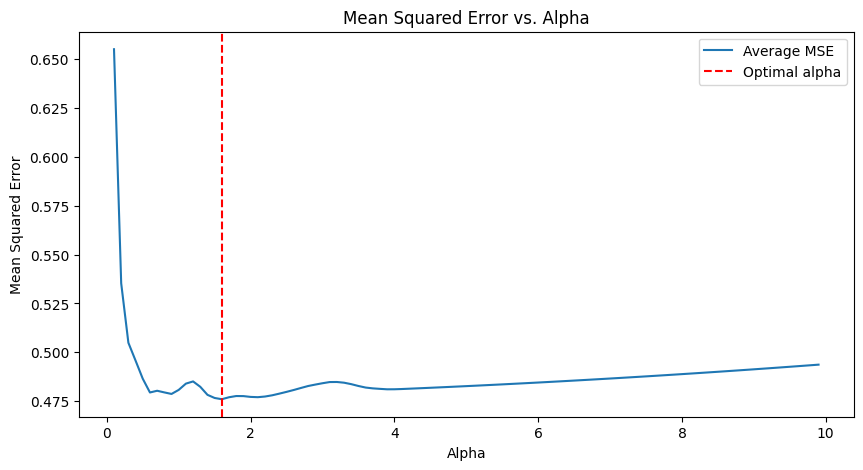

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(lasso_cv_uns.alphas_, lasso_cv_uns.mse_path_.mean(axis=-1), label="Average MSE")
plt.axvline(lasso_cv_uns.alpha_, linestyle="--", color="r", label="Optimal alpha")
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error vs. Alpha")
plt.show()

c:\Users\Sarthak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.064e-01, tolerance: 4.371e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Sarthak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.681e-01, tolerance: 4.371e-03
  model = cd_fast.enet_coordinate_descent(


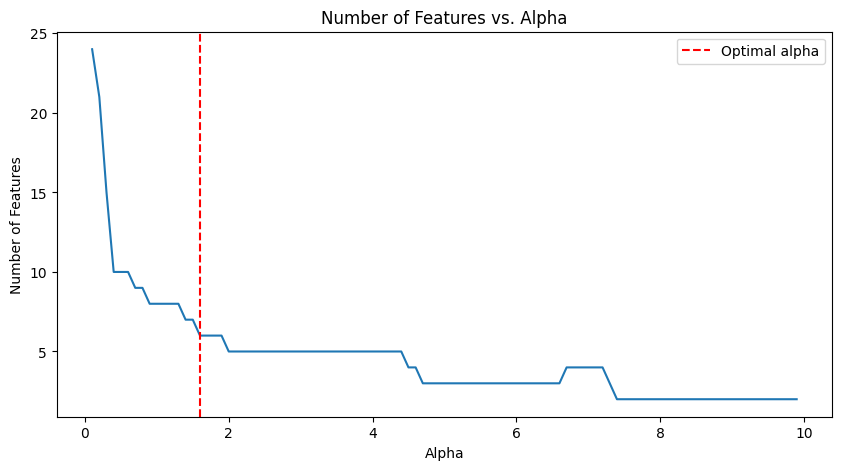

In [12]:
# plot the number of features selected with increase in alpha values
alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train, alphas=lasso_cv_uns.alphas_)

# Plot the number of features selected with increase in alpha values
plt.figure(figsize=(10, 5))
plt.plot(alphas_lasso, np.sum(coefs_lasso != 0, axis=0))
plt.axvline(lasso_cv_uns.alpha_, linestyle="--", color="r", label="Optimal alpha")
plt.xlabel("Alpha")
plt.ylabel("Number of Features")
plt.title("Number of Features vs. Alpha")
plt.legend()
plt.show()

### Scaled

In [13]:
alphas = np.arange(0.1, 10, 0.1)
lasso_cv = LassoCV(alphas=alphas, cv=50)
lasso_cv.fit(X_train_scaled, y_train)

print(f"Optimal alpha: {lasso_cv.alpha_}")
print(f"Number of features used: {np.sum(lasso_cv.coef_ != 0)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, lasso_cv.predict(X_test_scaled))}")

Optimal alpha: 0.1
Number of features used: 23
Mean Squared Error: 0.5571287885778209


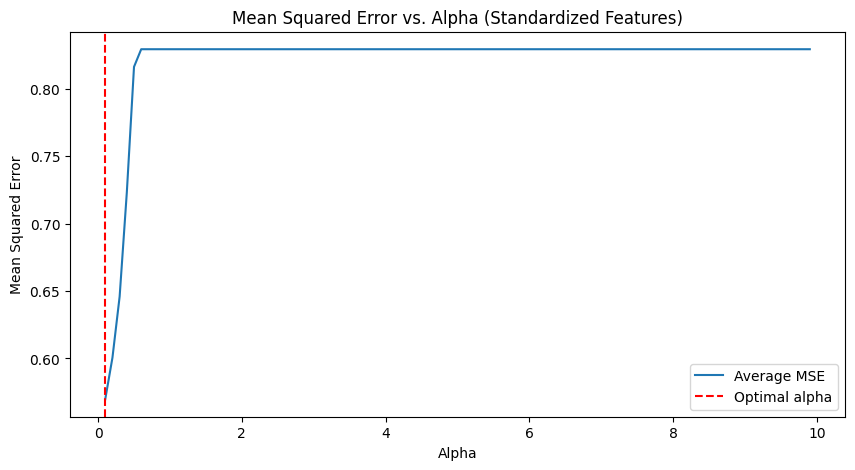

In [14]:
#plot the feature selection with increase in alpha values
plt.figure(figsize=(10, 5))
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=-1), label="Average MSE")
plt.axvline(lasso_cv.alpha_, linestyle="--", color="r", label="Optimal alpha")
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error vs. Alpha (Standardized Features)")
plt.show()

c:\Users\Sarthak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.064e-01, tolerance: 4.371e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Sarthak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.681e-01, tolerance: 4.371e-03
  model = cd_fast.enet_coordinate_descent(


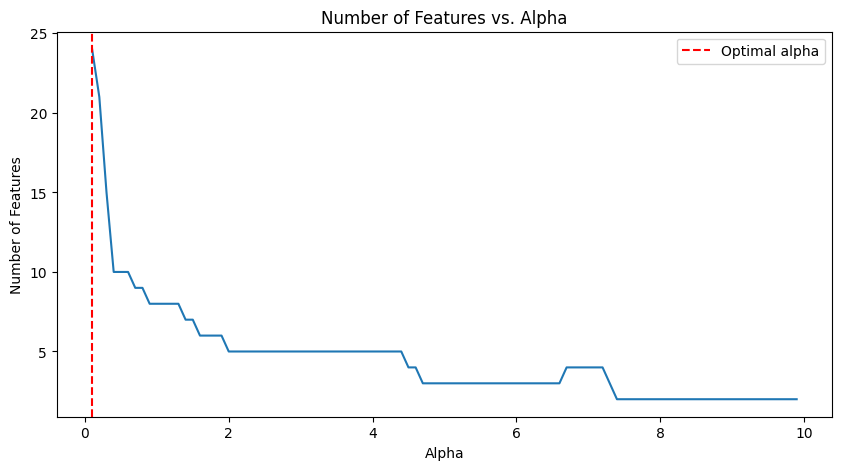

In [15]:
# plot the number of features selected with increase in alpha values
alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train, alphas=lasso_cv.alphas_)

# Plot the number of features selected with increase in alpha values
plt.figure(figsize=(10, 5))
plt.plot(alphas_lasso, np.sum(coefs_lasso != 0, axis=0))
plt.axvline(lasso_cv.alpha_, linestyle="--", color="r", label="Optimal alpha")
plt.xlabel("Alpha")
plt.ylabel("Number of Features")
plt.title("Number of Features vs. Alpha")
plt.legend()
plt.show()

## Elastic Net

### Unscaled data

In [16]:
# perform elastic net regression
alphas = np.logspace(-4, 0, 50)
elastic_net_cv = ElasticNetCV(alphas=alphas, l1_ratio=0.5, cv=5)
elastic_net_cv.fit(X_train, y_train)
print(f"Optimal alpha: {elastic_net_cv.alpha_}")
print(f"Optimal l1_ratio: {elastic_net_cv.l1_ratio_}")
print(f"Number of features used: {np.sum(elastic_net_cv.coef_ != 0)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, elastic_net_cv.predict(X_test))}")
opt_alpha=elastic_net_cv.alpha_
opt_l1_ratio=elastic_net_cv.l1_ratio_


c:\Users\Sarthak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.135e-03, tolerance: 3.794e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Sarthak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.501e-02, tolerance: 3.794e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Sarthak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check t

Optimal alpha: 1.0
Optimal l1_ratio: 0.5
Number of features used: 7
Mean Squared Error: 0.4100834239426377


c:\Users\Sarthak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.064e-02, tolerance: 3.600e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Sarthak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.556e-02, tolerance: 3.600e-03
  model = cd_fast.enet_coordinate_descent(


In [17]:
elastic_net = ElasticNet(alpha=opt_alpha, l1_ratio=opt_l1_ratio)  # Adjust alpha and l1_ratio for regularization
elastic_net.fit(X_train, y_train)
y_pred = elastic_net.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Number of features used: {np.sum(elastic_net_cv.coef_ != 0)}")

Mean Squared Error: 0.4100834239426377
Number of features used: 7


### Scaled

In [18]:
alphas = np.logspace(-4, 0, 50)
elastic_net_cv = ElasticNetCV(alphas=alphas, l1_ratio=0.5, cv=5)
elastic_net_cv.fit(X_train_scaled, y_train)
print(f"Optimal alpha: {elastic_net_cv.alpha_}")
print(f"Optimal l1_ratio: {elastic_net_cv.l1_ratio_}")
print(f"Number of features used: {np.sum(elastic_net_cv.coef_ != 0)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, elastic_net_cv.predict(X_test_scaled))}")
opt_alpha=elastic_net_cv.alpha_
opt_l1_ratio=elastic_net_cv.l1_ratio_

Optimal alpha: 0.2682695795279725
Optimal l1_ratio: 0.5
Number of features used: 34
Mean Squared Error: 0.5891939528736106


In [19]:
elastic_net = ElasticNet(alpha=opt_alpha, l1_ratio=opt_l1_ratio)  # Adjust alpha and l1_ratio for regularization
elastic_net.fit(X_train_scaled, y_train)
y_pred = elastic_net.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Number of features used: {np.sum(elastic_net_cv.coef_ != 0)}")

Mean Squared Error: 0.5891939528736106
Number of features used: 34
